<a href="https://www.kaggle.com/code/yaaangzhou/playground-s3-e20-tensorflow-nn-model-tutorial?scriptVersionId=139383961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Created by Yang Zhou**

**[PLAYGROUND S-3,E-20] 📊TensorFlow: NN Model Tutorial📈**

**8 Aug 2023**

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">🐼Predict CO2 Emissions in Rwanda[EN/CN]</center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">Playground Series - Season 3, Episode 20</center></p>

***

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Overview</center>

⚪ The notebook does not include analysis of EDA and other features, just predictions using Tensorflow. The goal is to learn how to use deep learning techniques in tasks.

⚪ As I am learning deep learning, my code may have some irregularities or some errors. I am very much looking forward to anyone's suggestions.

⚪ For those who want to use machine learning methods, please refer to my last [notebook](https://www.kaggle.com/code/yaaangzhou/en-playground-s3-e20-eda-modeling/).

#### <a id="top"></a>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">

* [0. Imports](#0)
* [1. Load data](#1)
* [2. Data preprocecssing](#2)
* [3. Feature Selection](#3)
* [4. Design Model](#4)
* [5. Submission](#5)

<a id="0"></a>
# <b> 0. Imports </b>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
tf.random.set_seed(0)

import geopandas as gpd
from haversine import haversine
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

<a id="1"></a>
# <b> 1. Load data </b>

In [2]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e20/sample_submission.csv')
train = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

train.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1, inplace=True)
test.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1, inplace=True)

In [3]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,2703.236800,2809.138386,829883.828686,-

<a id="2"></a>
# <b> 2. Data preprocecssing </b>

In [4]:
# from @DMITRY UAROV: https://www.kaggle.com/code/dmitryuarov/ps3e20-rwanda-emission-advanced-fe-29-7

def get_id(row):
    return int(''.join(filter(str.isdigit, str(row['latitude']))) + ''.join(filter(str.isdigit, str(row['longitude']))))

train['id'] = train[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
test['id'] = test[['latitude', 'longitude']].apply(lambda row: get_id(row), axis=1)
new_ids = {id_: new_id for new_id, id_ in enumerate(train['id'].unique())}
train['id'] = train['id'].map(new_ids)
test['id'] = test['id'].map(new_ids)

def get_month(row):
    date = dt.datetime.strptime(f'{row["year"]}-{row["week_no"]+1}-1', "%Y-%W-%w")
    return date.month

rwanda_center = (-1.9607, 29.9707)
park_biega = (-1.8866, 28.4518)
kirumba = (-0.5658, 29.1714)
massif = (-3.42, 28.592)
lake = (-2.0073, 31.6269)

def cluster_features(df, cluster_centers):
    for i, cc in enumerate(cluster_centers.values()):
        df[f'cluster_{i}'] = df.apply(lambda x: haversine((x['latitude'], x['longitude']), cc, unit='ft'), axis=1)
    return df

Y = train['emission']

def preprocessing(df):  
    # drop features with more than 50% nan.
    missing_ratios = df.isnull().mean()
    columns_to_drop = missing_ratios[missing_ratios > 0.5].index
    df = df.drop(columns_to_drop, axis=1)
    df = df.fillna(df.mean())
    
    cols_save = ['id', 'latitude', 'longitude', 'year', 'week_no', 'Ozone_solar_azimuth_angle']
    df = df[cols_save]
    
    # add features
    good_col = 'Ozone_solar_azimuth_angle'
    df[good_col] = df.groupby(['id', 'year'])[good_col].ffill().bfill()
    df[f'{good_col}_lag_1'] = df.groupby(['id', 'year'])[good_col].shift(1).fillna(0)
            
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['longitude']) + \
                     (np.sin(np.radians(15)) * df['latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['latitude']) + \
                     (np.sin(np.radians(15)) * df['longitude'])

    df['rot_30_x'] = (np.cos(np.radians(30)) * df['longitude']) + \
                     (np.sin(np.radians(30)) * df['latitude'])

    df['rot_30_y'] = (np.cos(np.radians(30)) * df['latitude']) + \
                     (np.sin(np.radians(30)) * df['longitude'])
    
    for col, coors in zip(
        ['dist_rwanda', 'dist_park', 'dist_kirumba', 'dist_massif', 'dist_lake'], 
        [rwanda_center, park_biega, kirumba, massif, lake]
    ):
        df[col] = df.apply(lambda x: haversine((x['latitude'], x['longitude']), coors, unit='ft'), axis=1)
    
    df['month'] = df[['year', 'week_no']].apply(lambda row: get_month(row), axis=1)
    df['is_covid'] = (df['year'] == 2020) & (df['month'] > 2) | (df['year'] == 2021) & (df['month'] == 1)
    df['is_lockdown'] = (df['year'] == 2020) & ((df['month'].isin([3,4])))
    df['week_no_sin'] = np.sin(df['week_no']*(2*np.pi/52))
    df['week_no_sin'] = np.sin(df['week_no']*(2*np.pi/52))
    
    df.fillna(0, inplace=True)

    return df
    
train = preprocessing(train)
test = preprocessing(test)

df = pd.concat([train, test], axis=0, ignore_index=True)
coordinates = df[['latitude', 'longitude']].values
clustering = KMeans(n_clusters=12, max_iter=1000, random_state=42).fit(coordinates)
cluster_centers = {i: tuple(centroid) for i, centroid in enumerate(clustering.cluster_centers_)}
df = cluster_features(df, cluster_centers)

train = df.iloc[:-len(test),:]
test = df.iloc[-len(test):,:]
del df

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
def feature_scalar(df):
    # scalar
    sc = StandardScaler()
    for i in df.columns:
        if i not in ['week_no', 'covid_flag','latitude','longitude','emission']:
            df[i] = sc.fit_transform(df[i].values.reshape(-1,1))
    return df

train = feature_scalar(train)
test = feature_scalar(test)

<a id="3"></a>
# <b> 3. Feature Selection </b>

In [6]:
# Code from my last notebook

featureSFS = ['id',
 'week_no',
 'Ozone_solar_azimuth_angle',
 'dist_rwanda',
 'dist_lake',
 'is_covid',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_8']

featureRFE = ['id', 'longitude', 'week_no', 'rot_15_y', 'dist_rwanda', 'dist_park', 'dist_kirumba', 'dist_lake', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_5', 'cluster_6', 'cluster_8', 'cluster_9']


In [7]:
X = train[featureSFS]
Y = Y
X_pred = test[featureSFS]

In [8]:
def calculateRMSE(x,y,features,model):
    for i,val in enumerate(x.columns):
        if val not in features:
            x = x.drop(columns=val)
    X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)
    clf = LGBMRegressor().fit(X_train,y_train)
    prediction = clf.predict(X_val)
    loss = np.sqrt(mean_squared_error(y_val,prediction))
    
    print(f"{model} has RMSE = {loss}")

<a id="4"></a>
# <b> 4. Design Model </b>

⚪ Fully connected networks can accept input of arbitrary shape, typically accepting as input a 2D tensor of shape `[batch_size, features]` , where batch_size is the number of samples in the batch, and features is the number of features per sample.

⚪ For example, if our input shape is `(10000, 30)`, there are 10000 data in it, and each data has 30 features. When passing data to DNN, input_shape should be `(30,)`. This is because, we usually don't specify batch_size in input_shape.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape,X_pred.shape)

(63218, 10) (15805, 10) (63218,) (15805,) (24353, 10)


⚪ Here, the number of features of our input is 32, therefore, our input shape is `(32,)`

In [10]:
input_shape = (10,)

⚪ `Batch normalization` is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling. 

⚪ It was proposed by Sergey Ioffe and Christian Szegedy in 2015.

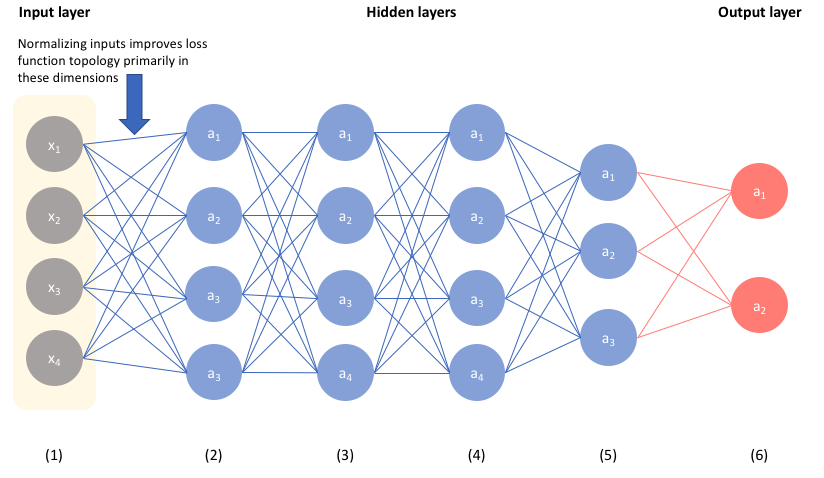

⚪ `Dropout` are regularization techniques for reducing overfitting by preventing complex co-adaptations on training data. 

⚪ They are an efficient way of performing model averaging with neural networks. 

⚪ It refers to thinning weights, while dropout refers to randomly "dropping out".

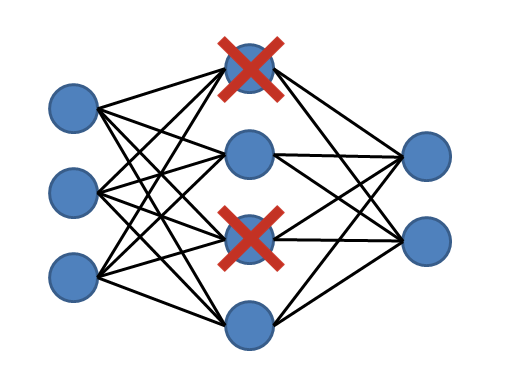

In [11]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),  
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),    
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # 50% dropout
    
    layers.Dense(1) # without any activiation function is same as a linear model
])

model.compile(loss= "mean_squared_error" , optimizer="RMSprop", metrics=["mse"])

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

⚪ `Early stopping` is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. 

⚪ Such methods update the learner so as to make it better fit the training data with each iteration. 

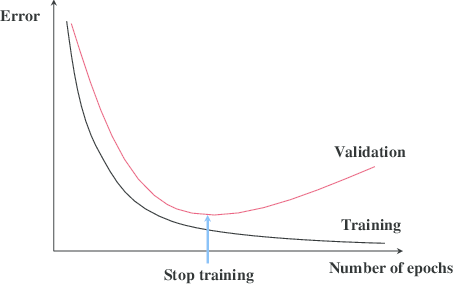

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss', 
                 mode='min', 
                 patience=15, 
                 verbose=1)

mc = tf.keras.callbacks.ModelCheckpoint (
    'best_model.h5', 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True,
    save_freq='epoch')

history = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val), 
    batch_size=128,
    callbacks=[early_stopping, mc])

val_loss, val_acc = model.evaluate(X_val, y_val)
print('val loss:', val_loss)
print('val accuracy:', val_acc)

Epoch 1/100
494/494 [==============================] - 3s 4ms/step - loss: 21442.7832 - mse: 21442.7832 - val_loss: 14347.8545 - val_mse: 14347.8545
Epoch 2/100
494/494 [==============================] - 2s 4ms/step - loss: 19661.7676 - mse: 19661.7676 - val_loss: 14186.6123 - val_mse: 14186.6123
Epoch 3/100
494/494 [==============================] - 2s 4ms/step - loss: 19587.4160 - mse: 19587.4160 - val_loss: 14087.3496 - val_mse: 14087.3496
Epoch 4/100
494/494 [==============================] - 2s 3ms/step - loss: 19485.5430 - mse: 19485.5430 - val_loss: 14023.2168 - val_mse: 14023.2168
Epoch 5/100
494/494 [==============================] - 2s 4ms/step - loss: 19422.7539 - mse: 19422.7539 - val_loss: 13965.2988 - val_mse: 13965.2988
Epoch 6/100
494/494 [==============================] - 2s 3ms/step - loss: 19355.2441 - mse: 19355.2441 - val_loss: 13931.4043 - val_mse: 13931.4043
Epoch 7/100
494/494 [==============================] - 2s 3ms/step - loss: 19222.0645 - mse: 19222.0645 - 

In [13]:
# predictions
predictions = model.predict(X_pred)

762/762 [==============================] - 1s 1ms/step


<a id="5"></a>
# <b> 5. Submission </b>

In [14]:
submission['emission'] = predictions
submission.to_csv('NN_submission.csv',index=False)